In [42]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [8]:
df1 = pd.read_csv('data/df_kg_v1.csv')
df_all1 = df1.copy()

In [10]:
y = df_all1.pop('actualkwh')
X = df_all1

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, test_size=.25, random_state=42)

In [50]:
params = {
    'alpha': np.linspace(0.01,.5,5),
    'l1_ratio': np.linspace(0,1,3)
}
en = ElasticNet()
gs_en = GridSearchCV(en, params, cv=3, verbose=1, n_jobs = 4)

In [51]:
gs_en.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    4.7s finished
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=3, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'alpha': array([0.01  , 0.1325, 0.255 , 0.3775, 0.5   ]), 'l1_ratio': array([0. , 0.5, 1. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [52]:
gs_en.best_score_

0.9581779002326206

In [53]:
gs_en.best_params_

{'alpha': 0.5, 'l1_ratio': 1.0}

In [54]:
gs_en.score(X_test, y_test)

0.9468594300444293

In [4]:
df0 = pd.read_csv('data/df_kgnasa.csv')

In [5]:
df = df0.copy()

In [6]:
y = df.pop('actualkwh')
X = df

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, test_size=.25, random_state=42)

In [24]:
params = {
    'alpha': np.linspace(1,4,20),
    'l1_ratio': np.linspace(0,1,4)
}
en = ElasticNet()
gs_en = GridSearchCV(en, params, cv=3, verbose=1, n_jobs = 4)

gs_en.fit(X_train, y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

GridSearchCV(cv=3, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'alpha': array([1.     , 1.15789, 1.31579, 1.47368, 1.63158, 1.78947, 1.94737,
       2.10526, 2.26316, 2.42105, 2.57895, 2.73684, 2.89474, 3.05263,
       3.21053, 3.36842, 3.52632, 3.68421, 3.84211, 4.     ]), 'l1_ratio': array([0.     , 0.33333, 0.66667, 1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [25]:
gs_en.best_score_

0.9583894124715684

In [9]:
# gs_en.best_score_

0.9583890191437258

In [26]:
gs_en.best_params_

{'alpha': 2.4210526315789473, 'l1_ratio': 1.0}

In [10]:
# gs_en.best_params_

{'alpha': 0.5, 'l1_ratio': 1.0}

In [27]:
gs_en.score(X_test, y_test)

0.9473688470060199

In [11]:
# gs_en.score(X_test, y_test)

0.9473724210714085

In [39]:
X.columns

Index(['capacity_dc_kw', 'opt_norm_tilt', 'opt_norm_az',
       'mount_type_Fixed - Roof Mounted', 'koeppen_Moderate',
       'paneltype_other', 'paneltype_poly', 'cellcategory_Premium',
       'cellcategory_Standard', 'cellcategory_Thin Film', 'ALLSKY_SFC_SW_DWN',
       'KT', 'PRECTOT', 'PS', 'T2M', 'WS2M'],
      dtype='object')

In [29]:
en = ElasticNet(alpha=2.4210526315789473, l1_ratio=1.0)

In [30]:
en.fit(X_train, y_train)

ElasticNet(alpha=2.4210526315789473, copy_X=True, fit_intercept=True,
      l1_ratio=1.0, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

Text(0.5,1,'Elastic Net Coefficients')

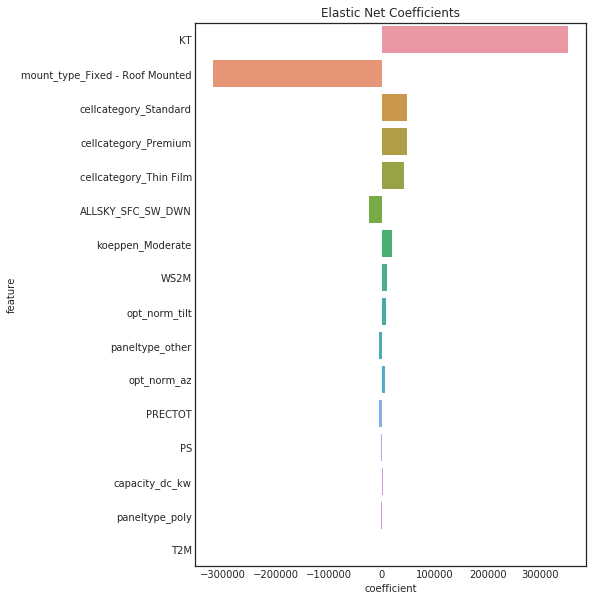

In [57]:
coefs = pd.DataFrame({
    'feature': X.columns,
    'coefficient': en.coef_,
    'abs_coef': np.abs(en.coef_)
})
coefs.sort_values('abs_coef', inplace=True, ascending=False)

plt.figure(figsize=(7,10))
sns.barplot(x=coefs.coefficient.head(16), y=coefs.feature.head(16), orient='h')
plt.title("Elastic Net Coefficients")

In [58]:
coefs

,feature,coefficient,abs_coef
11,KT,352340.043718,352340.043718
3,mount_type_Fixed - Roof Mounted,-318748.230360,318748.230360
8,cellcategory_Standard,47260.875289,47260.875289
7,cellcategory_Premium,47013.419563,47013.419563
9,cellcategory_Thin Film,42758.179937,42758.179937
10,ALLSKY_SFC_SW_DWN,-23322.793242,23322.793242
4,koeppen_Moderate,18488.011624,18488.011624
15,WS2M,9350.887839,9350.887839
1,opt_norm_tilt,7137.776836,7137.776836
5,paneltype_other,-5721.565039,5721.565039


In [43]:
pickle.dump(en, open('final_en_model.pkl', 'wb'))

In [48]:
rf = RandomForestRegressor(n_jobs=4)

# Creating gridsearch to find optimal parameters.
params = {
    'max_depth': np.linspace(50,100,10),
    'n_estimators': np.linspace(100,500,5, dtype=int)
}

gs_rf = GridSearchCV(rf, params, cv=4, verbose=1,n_jobs=4)

In [49]:
gs_rf.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  6.5min
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:  6.9min finished


GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'max_depth': array([ 50.     ,  55.55556,  61.11111,  66.66667,  72.22222,  77.77778,
        83.33333,  88.88889,  94.44444, 100.     ]), 'n_estimators': array([100, 200, 300, 400, 500])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [50]:
gs_rf.best_score_

0.9644029380816832

In [51]:
gs_rf.best_params_

{'max_depth': 88.88888888888889, 'n_estimators': 200}

In [52]:
gs_rf.score(X_test, y_test)

0.9640111814137597

In [53]:
rf = RandomForestRegressor(max_depth= 88.88888888888889, n_estimators=200,n_jobs=4)

In [54]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse',
           max_depth=88.88888888888889, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=4, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [59]:
rf.score(X_test, y_test)

0.9636283269678891

In [62]:
y_pred = rf.predict(X_test)
mean_squared_error(y_test, y_pred)

8207139491.904385

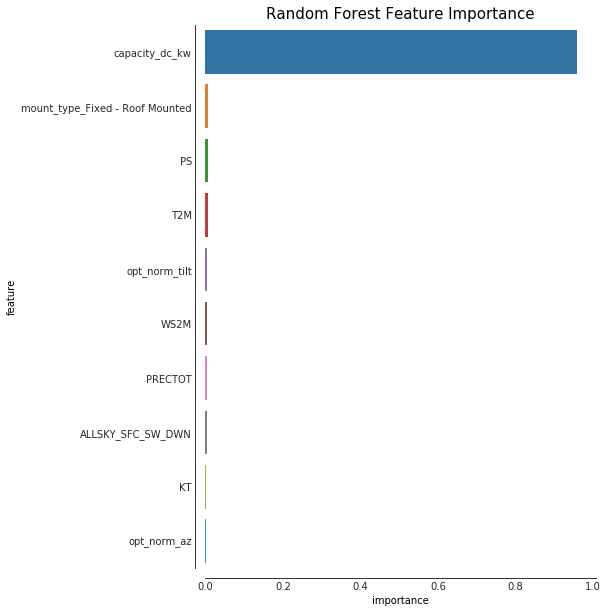

In [55]:
feature_imports = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
})

feature_imports.sort_values("importance", inplace=True, ascending=False)
plt.figure(figsize=(7,10))
sns.barplot(x=feature_imports.importance.head(10), y=feature_imports.feature.head(10), orient='h')
plt.title("Random Forest Feature Importance", size=15)
sns.set_style("white")
sns.despine(offset=10, trim=False);

In [56]:
pickle.dump(rf, open('final_rf_model.pkl', 'wb'))